[Reference](https://towardsdatascience.com/my-top-5-pandas-data-manipulation-function-680e346809c7)

In [1]:
import pandas as pd
import seaborn as sns

mpg = sns.load_dataset('mpg')

In [2]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# 1. crosstab

In [3]:
pd.crosstab(index = mpg['origin'], columns = mpg['model_year'])

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,5,4,5,7,6,6,8,4,6,4,9,4,2
japan,2,4,5,4,6,4,4,6,8,2,13,12,9
usa,22,20,18,29,15,20,22,18,22,23,7,13,20


In [4]:
pd.crosstab(index = mpg['origin'], columns = mpg['model_year'], values = mpg['mpg'], aggfunc = 'mean')

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,25.200000,28.75,22.000000,24.000000,27.000000,24.50,24.250000,29.250000,24.950000,30.450000,37.288889,31.575000,40.000000
japan,25.500000,29.50,24.200000,20.000000,29.333333,27.50,28.000000,27.416667,29.687500,32.950000,35.400000,32.958333,34.888889
usa,15.272727,18.10,16.277778,15.034483,18.333333,17.55,19.431818,20.722222,21.772727,23.478261,25.914286,27.530769,29.450000


# 2. cut

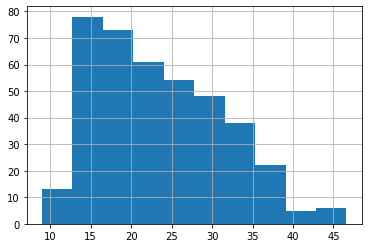

In [5]:
mpg['mpg'].hist()

In [6]:
pd.cut(x = mpg['mpg'], bins = 4, labels = [1,2,3,4])

0      1
1      1
2      1
3      1
4      1
      ..
393    2
394    4
395    3
396    3
397    3
Name: mpg, Length: 398, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [7]:
mpg['mpg_bin'] = pd.cut(x = mpg['mpg'], bins = 4, labels = [1,2,3,4])
mpg[['mpg', 'mpg_bin']]

,mpg,mpg_bin
0,18.0,1
1,15.0,1
2,18.0,1
3,16.0,1
4,17.0,1
...,...,...
393,27.0,2
394,44.0,4
395,32.0,3
396,28.0,3


# 3. qcut

In [8]:
pd.qcut(x = mpg['mpg'], q = 4, labels = [1,2,3,4])

0      2
1      1
2      2
3      1
4      1
      ..
393    3
394    4
395    4
396    3
397    4
Name: mpg, Length: 398, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [9]:
mpg['mpg_qcut'] = pd.qcut(x = mpg['mpg'], q = 4, labels = [1,2,3,4])
mpg[['mpg', 'mpg_bin','mpg_qcut']]

,mpg,mpg_bin,mpg_qcut
0,18.0,1,2
1,15.0,1,1
2,18.0,1,2
3,16.0,1,1
4,17.0,1,1
...,...,...,...
393,27.0,2,3
394,44.0,4,4
395,32.0,3,4
396,28.0,3,3


# 4. get_dummies

In [10]:
origin_dummies = pd.get_dummies(mpg['origin'])
origin_dummies

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


# 5. concat

In [11]:
pd.concat(objs = [mpg['mpg'], origin_dummies], axis = 1)

,mpg,europe,japan,usa
0,18.0,0,0,1
1,15.0,0,0,1
2,18.0,0,0,1
3,16.0,0,0,1
4,17.0,0,0,1
...,...,...,...,...
393,27.0,0,0,1
394,44.0,1,0,0
395,32.0,0,0,1
396,28.0,0,0,1


In [12]:
pd.concat([mpg['mpg'], origin_dummies], axis = 0)

,0,europe,japan,usa
0,18.0,NaN,NaN,NaN
1,15.0,NaN,NaN,NaN
2,18.0,NaN,NaN,NaN
3,16.0,NaN,NaN,NaN
4,17.0,NaN,NaN,NaN
...,...,...,...,...
393,NaN,0.0,0.0,1.0
394,NaN,1.0,0.0,0.0
395,NaN,0.0,0.0,1.0
396,NaN,0.0,0.0,1.0
